<a href="https://colab.research.google.com/github/neeleshnayak/Early_Stage_Diabetes_Detection/blob/main/Early_Stage_Diabetes_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#reading the dataset
df = pd.read_csv('/content/drive/MyDrive/diabetes_data_upload.csv')
#showing first few rows of the dataset
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [7]:
#checking missing values per feature
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

**Exploratory Data Analysis**

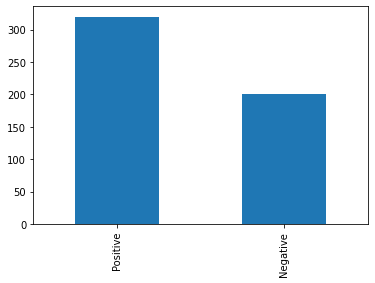

In [8]:
# plotting to create  bar plot distribution of target variable
df['class'].value_counts().plot(kind = 'bar')

In [9]:
# almost balanced dataset

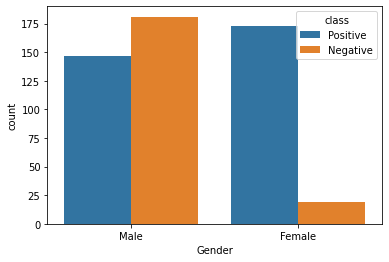

In [10]:
#Distribution of Gender
#plotting barchart for distribution
sns.countplot(df['Gender'],hue=df['class'], data=df)

In [11]:
#Males have a higher distribution of negative diabetes in comparison to females

In [ ]:
Distribution of Polyuria

Distribution of Polyuria:Polyuria is a medical condition where adults have a very frequent passage of large volumes of urine




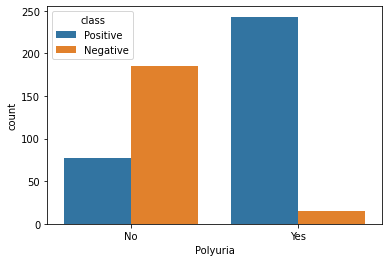

In [12]:
sns.countplot(df['Polyuria'],hue=df['class'], data=df)

presence of Polyuria signifies strong chances of diabetes

Distribution of Polydipsia:Polydipsia is defined as a medical condition of being thirsty all the time.


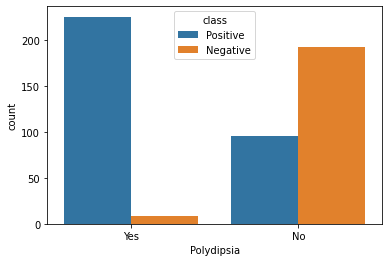

In [15]:
sns.countplot(df['Polydipsia'],hue=df['class'], data=df)

presence of Polydipsia signifies strong chances of diabetes 

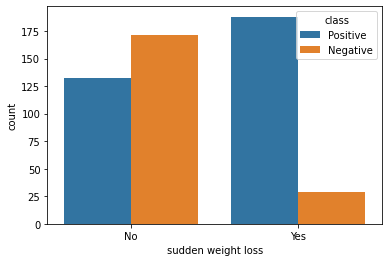

In [16]:
#Distribution of sudden weight loss
sns.countplot(df['sudden weight loss'],hue=df['class'], data=df)

patients having sudden weight loss are more prone to diabetes

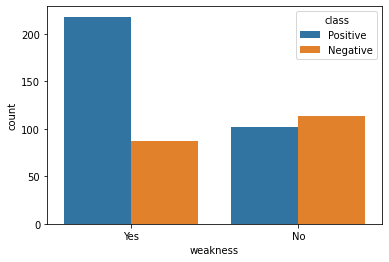

In [17]:
#Distribution of Weakness
sns.countplot(df['weakness'],hue=df['class'], data=df)

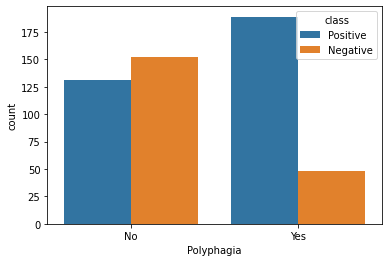

In [18]:
#Distribution of Polyphagia:Polyphagia is a medical condition of extreme hunger where hunger won’t go away even after eating more food
sns.countplot(df['Polyphagia'],hue=df['class'], data=df)



patients having polyphagia are more prone to diabetes

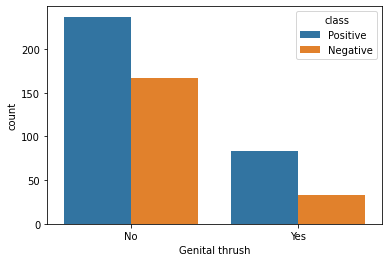

In [20]:
#Distribution of genital thrush: very painful and irritating medical condition in penis or vagina
sns.countplot(df['Genital thrush'],hue=df['class'], data=df)


From above distribution it is unclear about correlation between diabetes and Genital Thrush

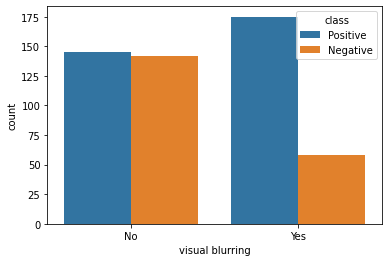

In [21]:
#Distribution of visual blurring: 
sns.countplot(df['visual blurring'],hue=df['class'], data=df)

From above distribution it is unclear about correlation between diabetes and visiual blur

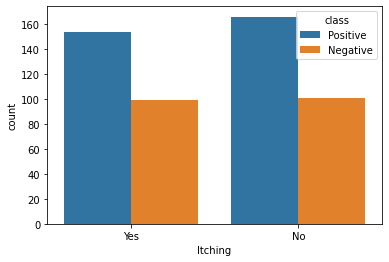

In [22]:
#Distribution of Itching
sns.countplot(df['Itching'],hue=df['class'], data=df)

Itching is a common condition and it may or may not be a contributing factor

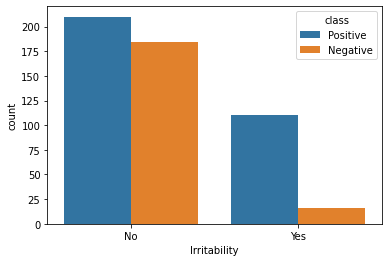

In [24]:
# Distribution of Irritability
sns.countplot(df['Irritability'],hue=df['class'], data=df)


Irritability is a common condition and it may or may not be a contributing factor

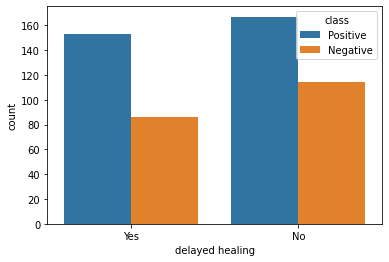

In [26]:
#Distribution of Delayed Healing
sns.countplot(df['delayed healing'],hue=df['class'], data=df)


Healing slowly may or may not be symptom of diabetes , however it along with other symptoms combined can be a symptom of diabetes

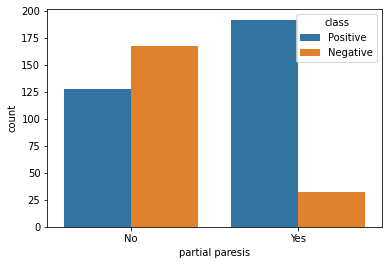

In [28]:
# Distribution of Partial Paresis:Paresis involves loosening the strength of a muscle or group of muscles
sns.countplot(df['partial paresis'],hue=df['class'], data=df)

The above distribution suggests that partial paresis is an important symptom in diabetes.

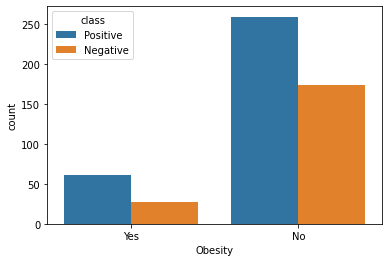

In [29]:
#Distribution of Obesity:
sns.countplot(df['Obesity'],hue=df['class'], data=df)

From the above distribution, it is evident that the dataset has very less obese patients but in general, we all know that obesity is more positively correlated with diabetes

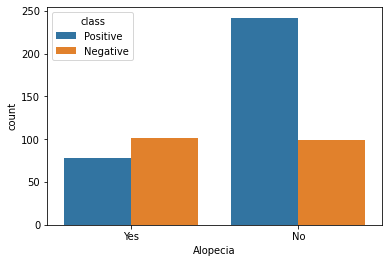

In [31]:
#Alopecia:Alopecia areata is a medical condition of sudden hair loss that starts with one or more circular bald patches
sns.countplot(df['Alopecia'],hue=df['class'], data=df)

from above  distribution no corrilation can be obtained between Alopecia and Diabetes

Data Pre-processing



In [32]:
# transforming target column from string to numeric format
df['class'] = df['class'].map({'Positive':1,'Negative':0})

In [34]:
df['class'].unique() # changes applied

array([1, 0])

In [35]:
# Splitting Dependent and Indeoendent Variables
X= df.drop(['class'],axis=1)
y=df['class']

In [36]:
# converting categorical variables into numeric using label encoding

#creating a list of object datatypes
objList = X.select_dtypes(include = "object").columns


In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feat in objList:
    X[feat] = le.fit_transform(X[feat].astype(str))
print (X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   sudden weight loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
dtypes: int64(16)
memory usage: 65.1 KB
None


In [39]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [40]:
# all feattures are now numeric

In [48]:
#Correlation

# Correlation of dependent variables with independent variables
X.corrwith(y)

Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
dtype: float64

olyuria and Polydipsia are the most positively correlated features whereas Gender and Alopecia are the negatively correlated features

In [50]:
from sklearn.model_selection import train_test_split

In [52]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 52)

#Data Normalization
# In given dataset age feature is inconsistent with respect to other features, thus we will normalize it into same scale using minmax scaler




In [54]:
# instantiating minmax scaling object
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
#apply minmax scaling on Age feature
X_train[['Age']] = minmax.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax.transform(X_test[['Age']])

In [55]:
X_train.head(2)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
335,0.500000,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0
11,0.297297,1,1,1,0,0,1,1,0,1,0,1,0,1,0,0


In [57]:
#Model Building

# first lets check with most basic Logistic Regression

from sklearn.linear_model import LogisticRegression
logi = LogisticRegression(random_state = 0, penalty = 'l2') # l1 signifies ridge regression
logi.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [79]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score

In [91]:
#Model Evaluation
y_predict_logi = logi.predict(X_test)
acc= accuracy_score(y_test, y_predict_logi)
roc=roc_auc_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)
results = pd.DataFrame([['Logistic Regression',acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.903846,0.897059,0.953125,0.924242,0.889062


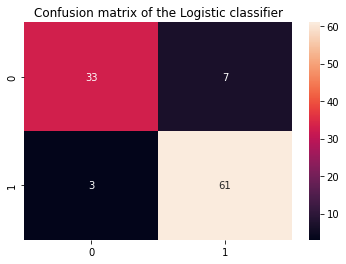

In [92]:
cm_logi = confusion_matrix(y_test, y_predict_logi)
plt.title('Confusion matrix of the Logistic classifier')
sns.heatmap(cm_logi,annot=True)
plt.show()

In [93]:
# Feature Importance
feature_importance = abs(logi.coef_[0])
feature_importance


array([0.74077995, 2.65272074, 2.867137  , 2.64224635, 0.69694678,
       0.46174362, 0.59765004, 0.96566318, 0.24954738, 0.9668878 ,
       1.44879547, 0.49804346, 0.6198033 , 0.58120522, 0.41362314,
       0.29142258])

In [94]:
X.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [95]:
features = pd.DataFrame([feature_importance],
               columns = X.columns)

In [104]:
features.loc[0].sort_values(ascending=False)

Polyuria              2.867137
Gender                2.652721
Polydipsia            2.642246
Irritability          1.448795
Itching               0.966888
Genital thrush        0.965663
Age                   0.740780
sudden weight loss    0.696947
partial paresis       0.619803
Polyphagia            0.597650
muscle stiffness      0.581205
delayed healing       0.498043
weakness              0.461744
Alopecia              0.413623
Obesity               0.291423
visual blurring       0.249547
Name: 0, dtype: float64

So, based on the table, the top 5 most contributing features of the logistic regression model are  Polyuria, Gender, Polydipsia Itching, and Irritability.

In [97]:
# Lets Check with random forest model now
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini',n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [98]:

y_predict_r = rf.predict(X_test)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)
model_results = pd.DataFrame([['Random Forest (Untuned)',acc, prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.903846,0.897059,0.953125,0.924242,0.889062
1,Random Forest (Untuned),0.971154,0.969231,0.984375,0.976744,0.967187


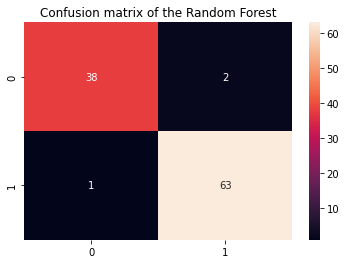

In [99]:
cm_rf = confusion_matrix(y_test, y_predict_r)
plt.title('Confusion matrix of the Random Forest')
sns.heatmap(cm_rf,annot=True)
plt.show()

In [103]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.sort_values(ascending=False)

Polyuria              0.243607
Polydipsia            0.198022
Gender                0.095619
Age                   0.086804
sudden weight loss    0.063364
Irritability          0.044977
partial paresis       0.041803
Alopecia              0.035418
delayed healing       0.030555
muscle stiffness      0.028596
Polyphagia            0.027212
Itching               0.027191
visual blurring       0.024681
Obesity               0.017987
weakness              0.017624
Genital thrush        0.016539
dtype: float64

Based on the above feature importance table the top 5 features are Polydipsia, Polyuria, Age, Gender, and sudden weight loss.

# Based on the above predictions it is evident that, Random forest has performed better than logistic regression